In [1]:
%load_ext autoreload
%autoreload 2
from GDS import *

In [2]:
GeneExon = pd.read_csv("../dat/GTEx_gencode_exons.coding.csv", index_col="exon_id")
GeneExon.head(2)

/Users/jiayao/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,chr,start_pos,end_pos,strand,gene
exon_id,,,,,
ENSG00000186092.4_1,1,69091,70008,+,OR4F5
ENSG00000237683.5_1,1,137966,139379,-,AL627309.1


In [3]:
Genes = list(set(GeneExon["gene"].values))
Genes[:10]
print(len(Genes))

18071


In [8]:
syn = pd.read_csv("../dat/gnomad.mut.1e-3.syn.bed.gz", delimiter="\t")
syn.head(2)

,#Chr,Start,End,VAR,Gene,AC,Cons
0,1,69096,69097,69096-G-A,OR4F5,2,synonymous_variant
1,1,69183,69184,69183-C-T,OR4F5,2,synonymous_variant


In [9]:
Dat = {}
for i in range(len(Genes)):
    gene = Genes[i]
    tmp_mut = syn[syn["Gene"]==gene]
    tmp_exon = GeneExon[GeneExon["gene"]==gene]
    Gene_obj = GeneExonVar(gene, tmp_exon)
    Gene_obj.addVars(tmp_mut)
    Dat[gene] = Gene_obj

In [14]:
step = 0.01
l = np.arange(0, 1, step) + step
density_mat = []
for i, (k, v) in enumerate(Dat.items()):
    pos, den = v.Percentile()
    res = Percentile(pos, den, l)
    density_mat.append(res)
    #if i >= 10:
    #    break
density_mat = np.array(density_mat)

In [18]:
np.save("./dat/syn.0.01.mat", density_mat)

Text(0, 0.5, 'Average Mutation Density')

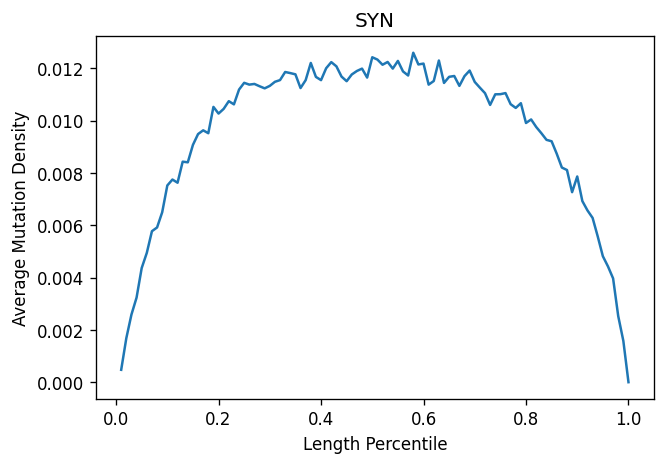

In [16]:
avg_den = np.mean(density_mat, axis=0)
plt.figure(dpi=120)
plt.plot(l, avg_den)
plt.title("SYN")
plt.xlabel("Length Percentile")
plt.ylabel("Average Mutation Density")